In [27]:
#%% Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

auto_df = pd.read_csv('./Auto.data', delim_whitespace=True, na_values='?').dropna()


print(auto_df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0  3504.0          12.0    70   
1  15.0          8         350.0       165.0  3693.0          11.5    70   
2  18.0          8         318.0       150.0  3436.0          11.0    70   
3  16.0          8         304.0       150.0  3433.0          12.0    70   
4  17.0          8         302.0       140.0  3449.0          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


C:\Users\saqom\AppData\Local\Temp\ipykernel_30716\880797181.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_df = pd.read_csv('./Auto.data', delim_whitespace=True, na_values='?').dropna()


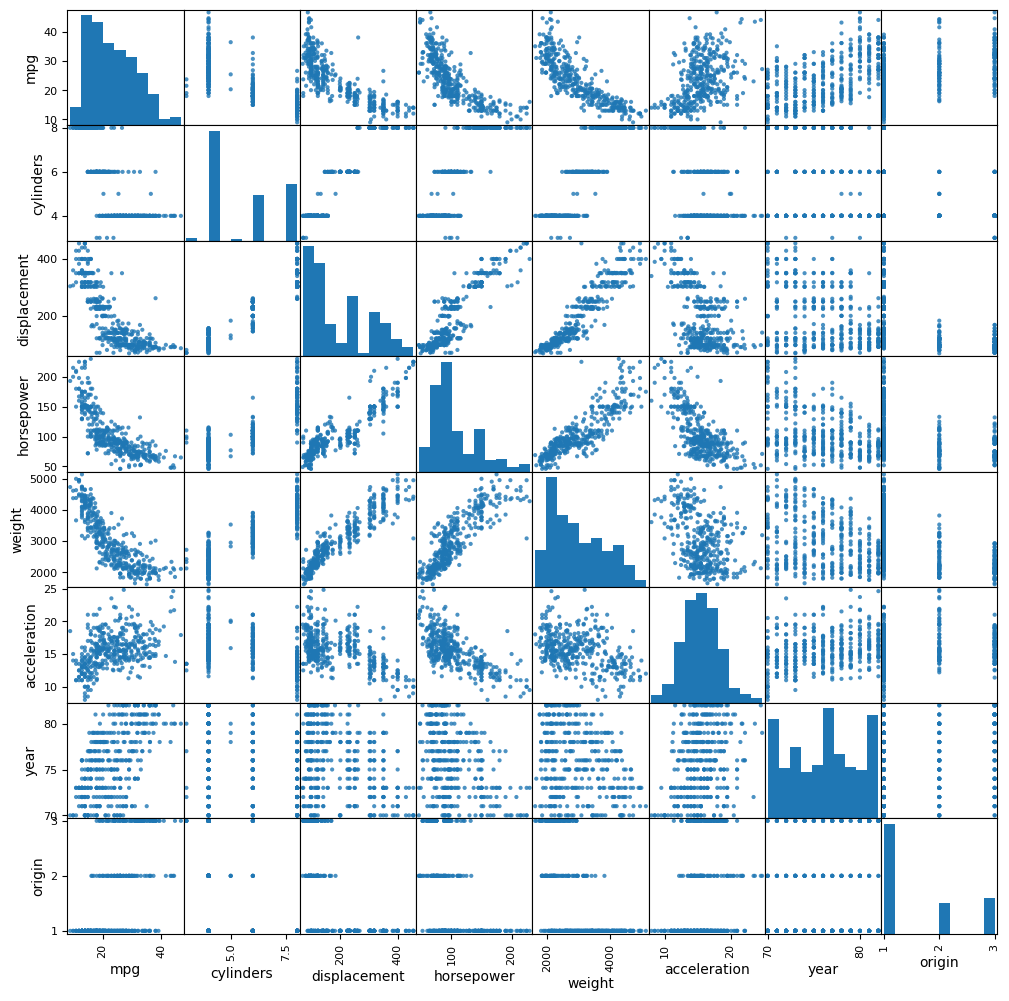

In [19]:

cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']


pd.plotting.scatter_matrix(auto_df[cols], figsize=(12, 12), alpha=0.8, diagonal='hist')

plt.show()


In [20]:
correlation_matrix = auto_df[cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  

In [21]:
model = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=auto_df).fit()

print("OLS Regression Results:")
print(model.summary())


OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          2.04e-139
Time:                        19:06:37   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184 

In [22]:
anova_results = anova_lm(model)
print(anova_results)

                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


ii. Predictors with p-values less than 0.05 are typically considered statistically significant. Based on the regression output, the following predictors have a significant relationship to the response variable (mpg):

displacement (p = 0.008)

weight (p < 0.001)

year (p < 0.001)

origin (p < 0.001)

These variables have strong evidence against the null hypothesis, indicating a meaningful linear relationship with mpg.

The following predictors do not appear statistically significant (p > 0.05):

cylinders

horsepower

acceleration


iii. What does the coefficient for the year variable suggest?
The coefficient for year is 0.7508, which means:

For each one-year increase in the model year of a car, the expected miles per gallon (mpg) increases by approximately 0.75, assuming all other variables remain constant.

This suggests that newer cars tend to be more fuel-efficient, which aligns with improvements in automotive technology over time.

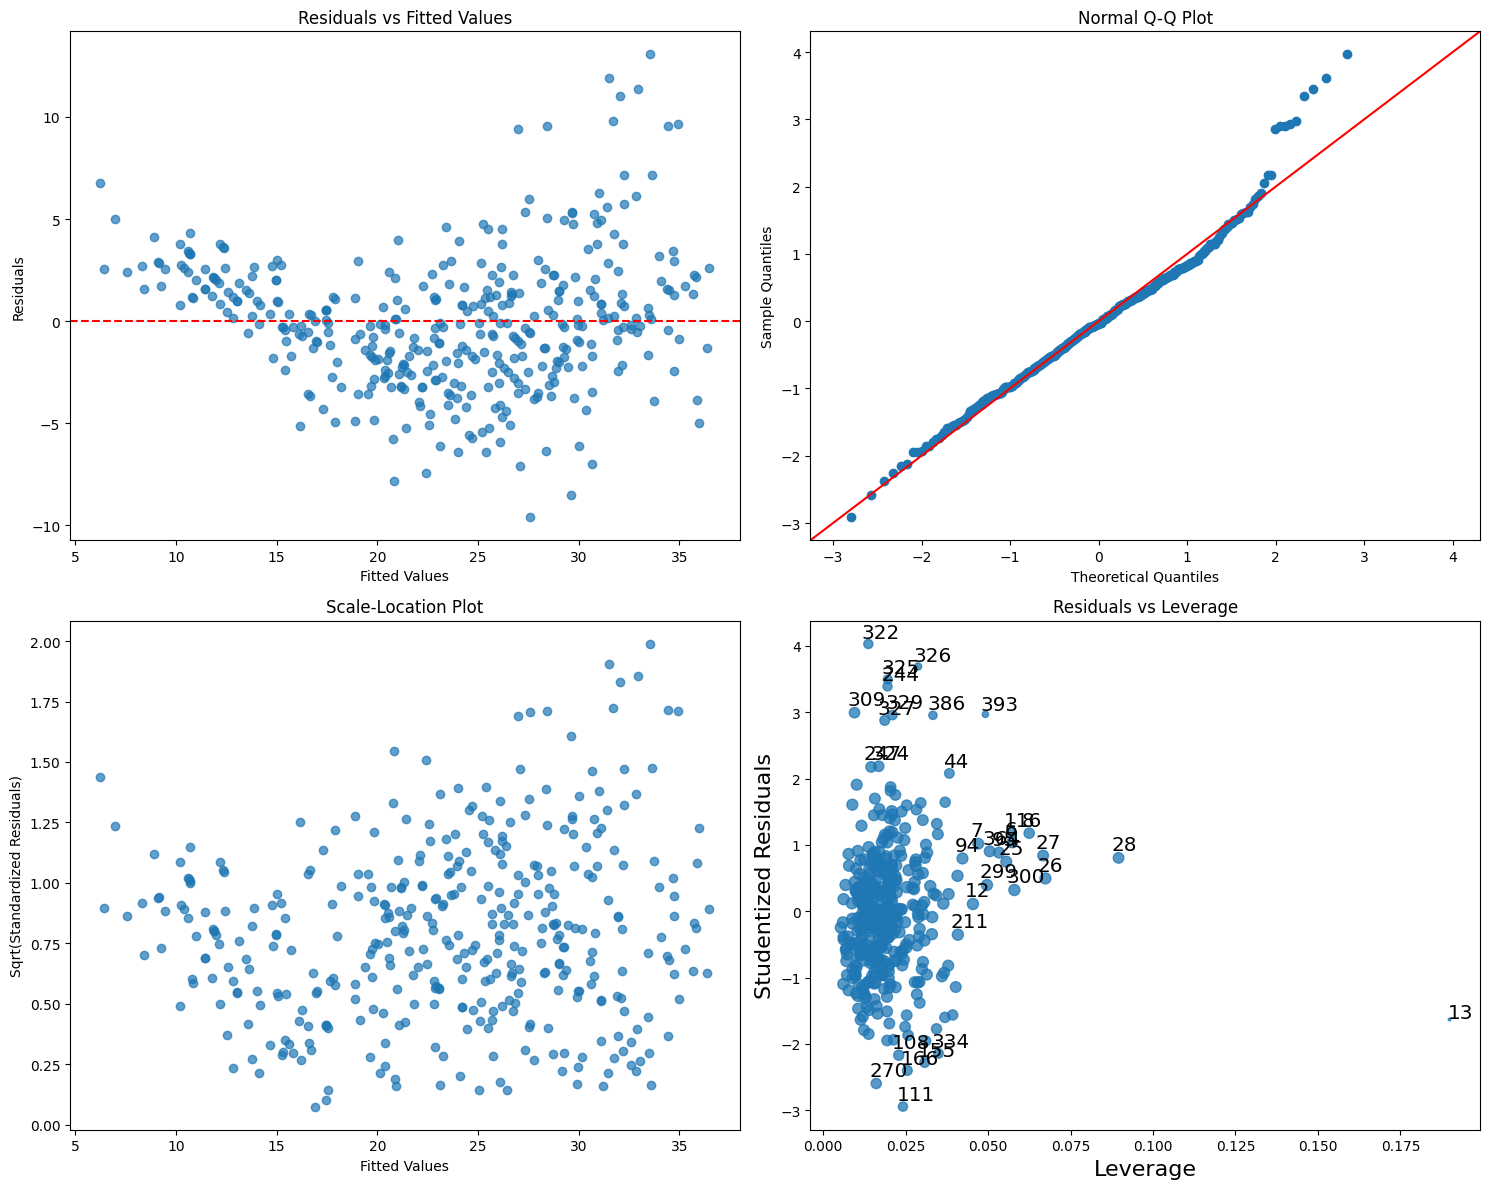

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data, using whitespace as delimiter and handling missing values, then dropping any rows with missing data.
auto_df = pd.read_csv('./Auto.data', delim_whitespace=True, na_values='?').dropna()

# Create a list of the numeric columns you want to include. 
# 'name' has been removed because it is likely non-numeric.
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

# Generate the scatter matrix for the specified columns.
pd.plotting.scatter_matrix(auto_df[cols], figsize=(12, 12), alpha=0.8, diagonal='hist')

# Display the plot
plt.show()


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     239.1
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          5.57e-151
Time:                        19:15:47   Log-Likelihood:                -990.36
No. Observations:                 392   AIC:                             2001.
Df Residuals:                     382   BIC:                             2040.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -114.2297     13.425     -8.509

In [25]:
auto_df_log = auto_df.copy()
auto_df_log['log_displacement'] = np.log(auto_df_log['displacement'])
auto_df_log['log_horsepower']   = np.log(auto_df_log['horsepower'])
auto_df_log['log_weight']       = np.log(auto_df_log['weight'])

# Fit the model using the log-transformed variables for displacement, horsepower, and weight.
model_log = smf.ols(
    'mpg ~ cylinders + log_displacement + log_horsepower + log_weight + acceleration + year + origin',
    data=auto_df_log
).fit()

print("### Model 2: Log-Transformed Variables ###")
print(model_log.summary())


### Model 2: Log-Transformed Variables ###
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     305.6
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          1.06e-152
Time:                        19:17:47   Log-Likelihood:                -992.17
No. Observations:                 392   AIC:                             2000.
Df Residuals:                     384   BIC:                             2032.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [26]:
model_poly = smf.ols(
    'mpg ~ cylinders + displacement + horsepower + weight + acceleration + I(acceleration**2) + year + origin',
    data=auto_df
).fit()

print("### Model 3: Including a Squared Term for Acceleration ###")
print(model_poly.summary())

### Model 3: Including a Squared Term for Acceleration ###
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     236.3
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          5.12e-143
Time:                        19:18:04   Log-Likelihood:                -1012.1
No. Observations:                 392   AIC:                             2042.
Df Residuals:                     383   BIC:                             2078.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------